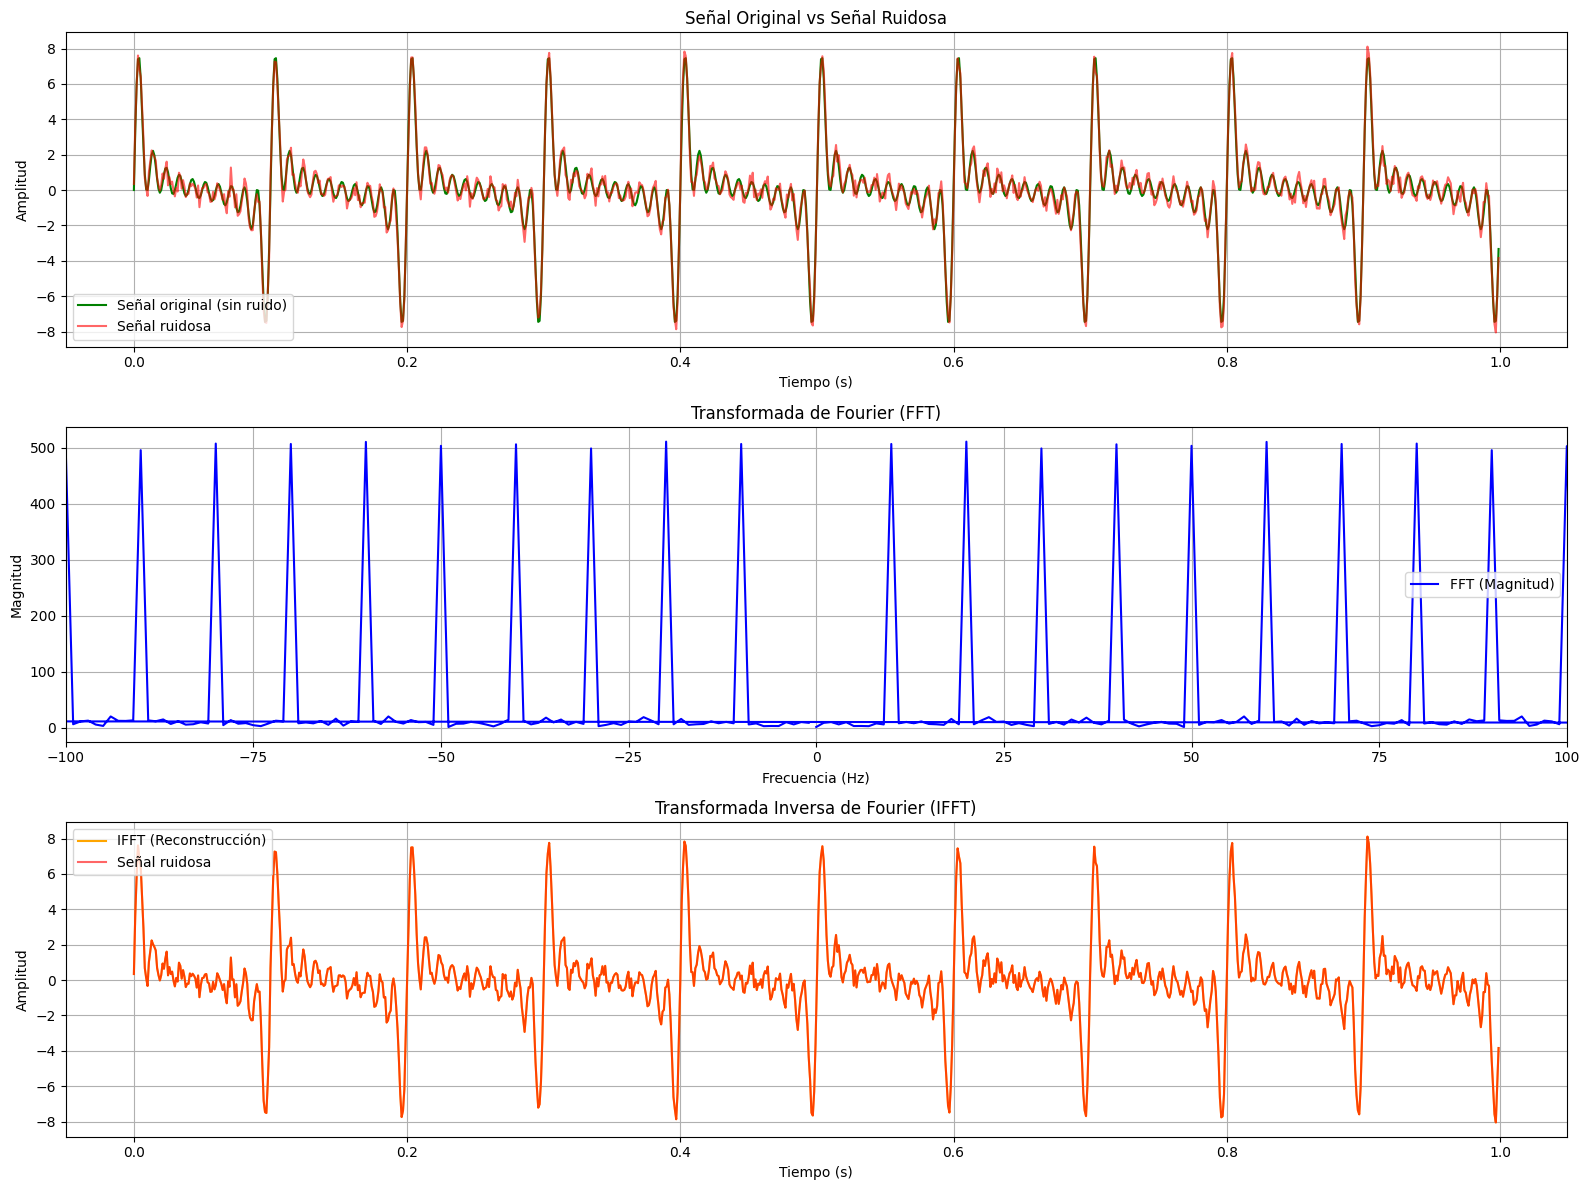

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
fs = 1000  # Frecuencia de muestreo en Hz
t = np.linspace(0, 1, fs, endpoint=False)  # Vector de tiempo de 1 segundo

# Frecuencias de las señales
frecuencias = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Generar señales sinusoidales
señales = [np.sin(2 * np.pi * f * t) for f in frecuencias]

# Suma total de señales (señal original sin ruido)
señal_original = np.sum(señales, axis=0)

# Agregar ruido blanco gaussiano
ruido = np.random.normal(0, 0.3, señal_original.shape)
señal_ruidosa = señal_original + ruido

# Calcular la FFT y el espectro de potencia
fft_resultado = np.fft.fft(señal_ruidosa)
frecuencias_fft = np.fft.fftfreq(len(t), 1 / fs)

# Calcular la IFFT
ifft_resultado = np.fft.ifft(fft_resultado)

# Graficar resultados
plt.figure(figsize=(16, 12))

# Señal original y ruidosa
plt.subplot(3, 1, 1)
plt.plot(t, señal_original, label='Señal original (sin ruido)', color='green')
plt.plot(t, señal_ruidosa, label='Señal ruidosa', color='red', alpha=0.6)
plt.title('Señal Original vs Señal Ruidosa')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# FFT
plt.subplot(3, 1, 2)
plt.plot(frecuencias_fft, np.abs(fft_resultado), label='FFT (Magnitud)', color='blue')
plt.xlim(-100, 100)
plt.title('Transformada de Fourier (FFT)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.legend()
plt.grid()

# IFFT
plt.subplot(3, 1, 3)
plt.plot(t, np.real(ifft_resultado), label='IFFT (Reconstrucción)', color='orange')
plt.plot(t, señal_ruidosa, label='Señal ruidosa', color='red', alpha=0.6)
plt.title('Transformada Inversa de Fourier (IFFT)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


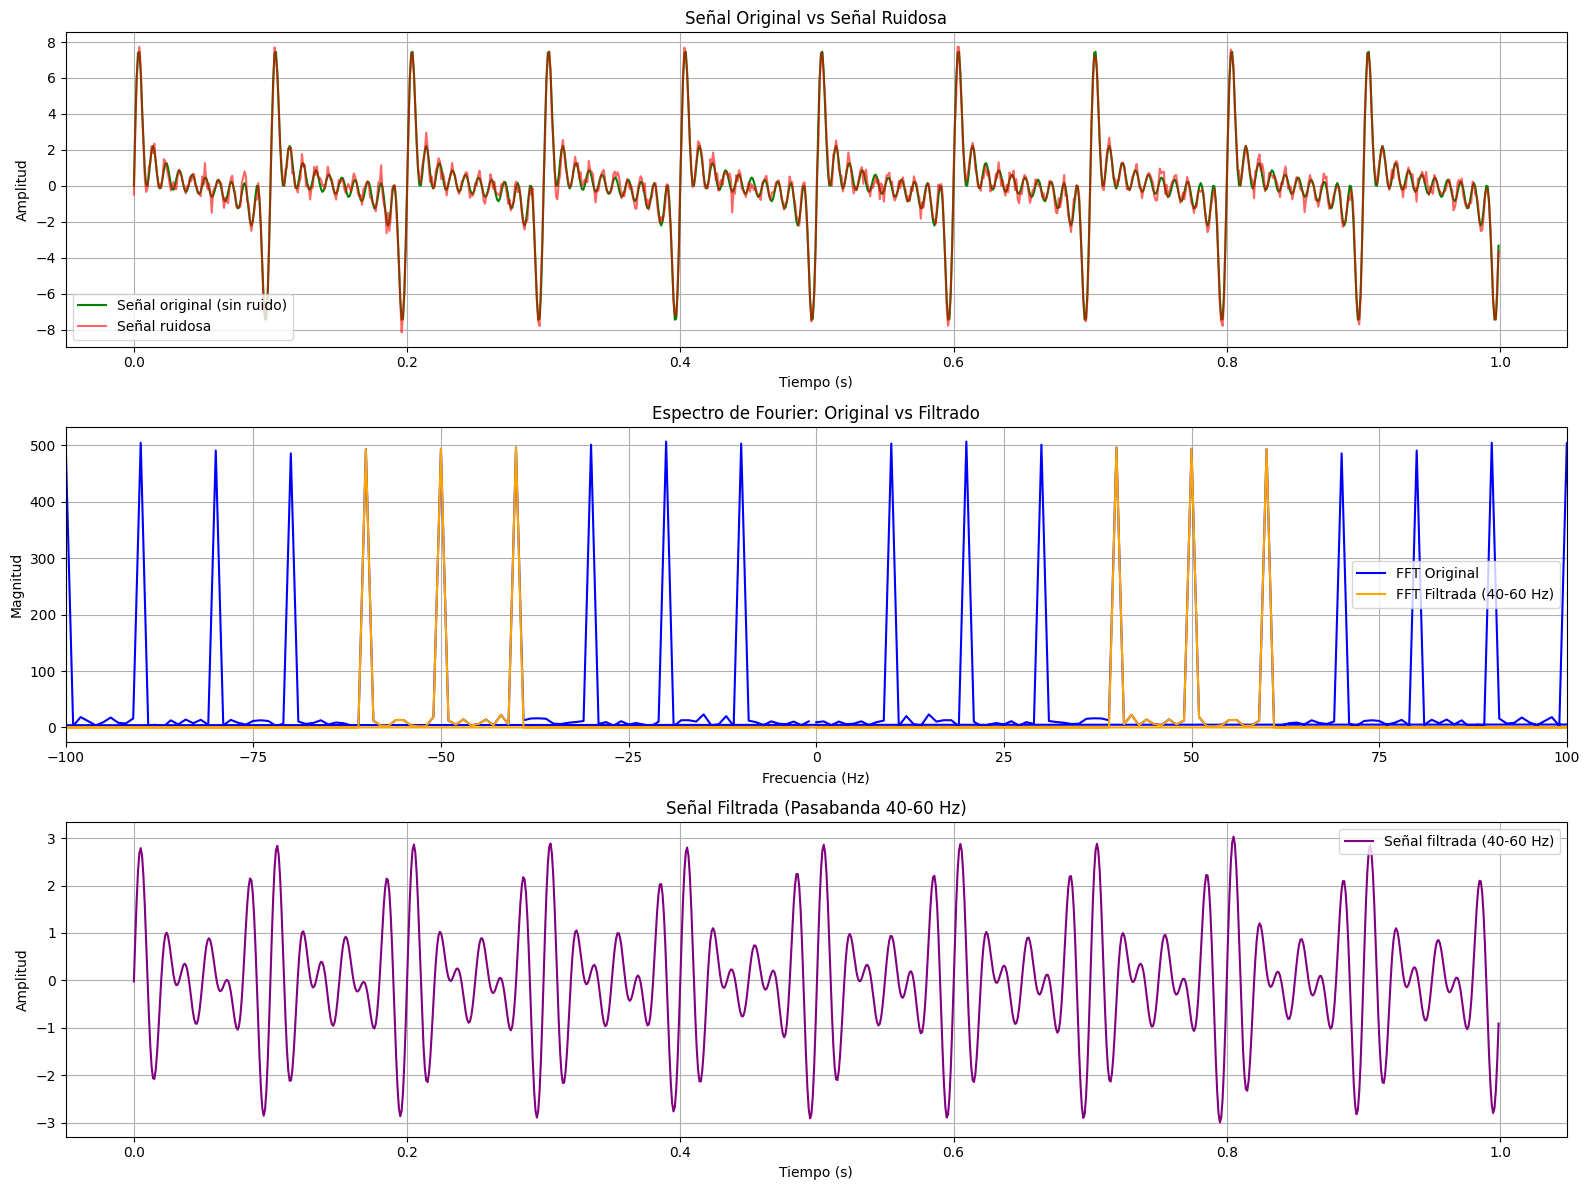

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
fs = 1000  # Frecuencia de muestreo en Hz
t = np.linspace(0, 1, fs, endpoint=False)  # Vector de tiempo de 1 segundo

# Frecuencias de las señales
frecuencias = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Generar señales sinusoidales
señales = [np.sin(2 * np.pi * f * t) for f in frecuencias]

# Suma total de señales (señal original sin ruido)
señal_original = np.sum(señales, axis=0)

# Agregar ruido blanco gaussiano
ruido = np.random.normal(0, 0.3, señal_original.shape)
señal_ruidosa = señal_original + ruido

# Calcular la FFT de la señal ruidosa
fft_resultado = np.fft.fft(señal_ruidosa)
frecuencias_fft = np.fft.fftfreq(len(t), 1 / fs)

# Diseño del filtro pasabanda (40 Hz a 60 Hz)
pasabanda = (np.abs(frecuencias_fft) >= 40) & (np.abs(frecuencias_fft) <= 60)
fft_filtrada = fft_resultado * pasabanda  # Aplicar el filtro en el dominio frecuencial

# Calcular la señal filtrada mediante IFFT
señal_filtrada = np.fft.ifft(fft_filtrada)

# Graficar resultados
plt.figure(figsize=(16, 12))

# Señal original y ruidosa
plt.subplot(3, 1, 1)
plt.plot(t, señal_original, label='Señal original (sin ruido)', color='green')
plt.plot(t, señal_ruidosa, label='Señal ruidosa', color='red', alpha=0.6)
plt.title('Señal Original vs Señal Ruidosa')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# Espectro original y filtrado
plt.subplot(3, 1, 2)
plt.plot(frecuencias_fft, np.abs(fft_resultado), label='FFT Original', color='blue')
plt.plot(frecuencias_fft, np.abs(fft_filtrada), label='FFT Filtrada (40-60 Hz)', color='orange')
plt.xlim(-100, 100)
plt.title('Espectro de Fourier: Original vs Filtrado')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.legend()
plt.grid()

# Señal filtrada
plt.subplot(3, 1, 3)
plt.plot(t, np.real(señal_filtrada), label='Señal filtrada (40-60 Hz)', color='purple')
plt.title('Señal Filtrada (Pasabanda 40-60 Hz)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


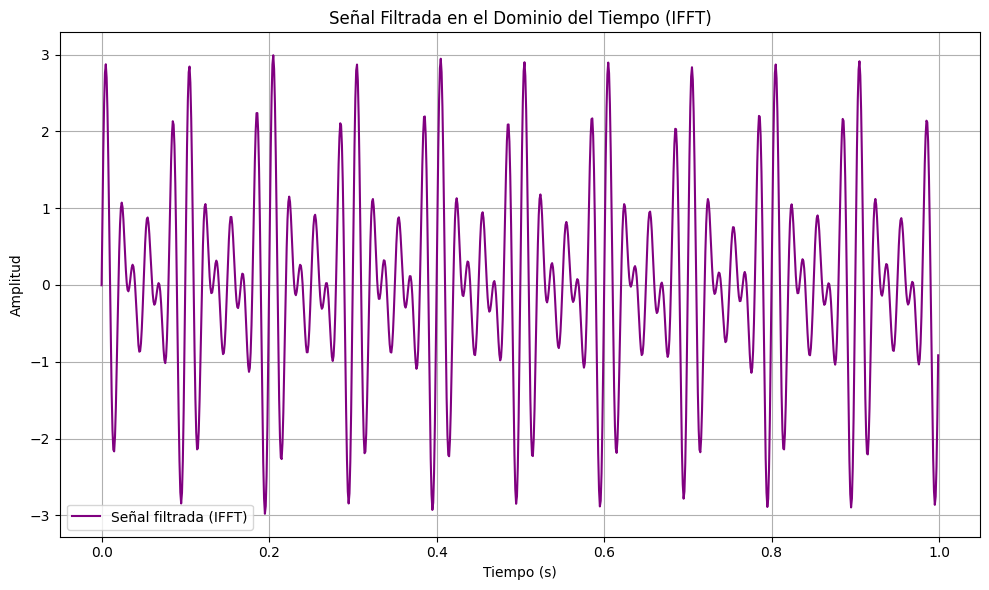

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
fs = 1000  # Frecuencia de muestreo en Hz
t = np.linspace(0, 1, fs, endpoint=False)  # Vector de tiempo de 1 segundo

# Frecuencias de las señales
frecuencias = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Generar señales sinusoidales
señales = [np.sin(2 * np.pi * f * t) for f in frecuencias]

# Suma total de señales (señal original sin ruido)
señal_original = np.sum(señales, axis=0)

# Agregar ruido blanco gaussiano
ruido = np.random.normal(0, 0.3, señal_original.shape)
señal_ruidosa = señal_original + ruido

# Calcular la FFT de la señal ruidosa
fft_resultado = np.fft.fft(señal_ruidosa)
frecuencias_fft = np.fft.fftfreq(len(t), 1 / fs)

# Diseño del filtro pasabanda (40 Hz a 60 Hz)
pasabanda = (np.abs(frecuencias_fft) >= 40) & (np.abs(frecuencias_fft) <= 60)
fft_filtrada = fft_resultado * pasabanda  # Aplicar el filtro en el dominio frecuencial

# Calcular la IFFT de la señal filtrada
señal_filtrada = np.fft.ifft(fft_filtrada)

# Graficar la señal filtrada en el dominio temporal
plt.figure(figsize=(10, 6))

plt.plot(t, np.real(señal_filtrada), label='Señal filtrada (IFFT)', color='purple')
plt.title('Señal Filtrada en el Dominio del Tiempo (IFFT)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
